# Exercício de fixação de conceitos 3

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import sklearn.metrics as sk
import seaborn as sns

In [2]:
dados = genfromtxt('dados_diabetes.csv', delimiter=',')

In [3]:
dados = dados[1:,:] #remover cabeçalho
print(dados)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [4]:
# cria as matrizes X e y sendo 20% dos dados para teste e o restante para treino
X = dados[:,:-1] #remove a última coluna de 0 e 1's
y = dados[:,-1:] #seleciona somente a última coluna
y = y.ravel()

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, stratify = y)

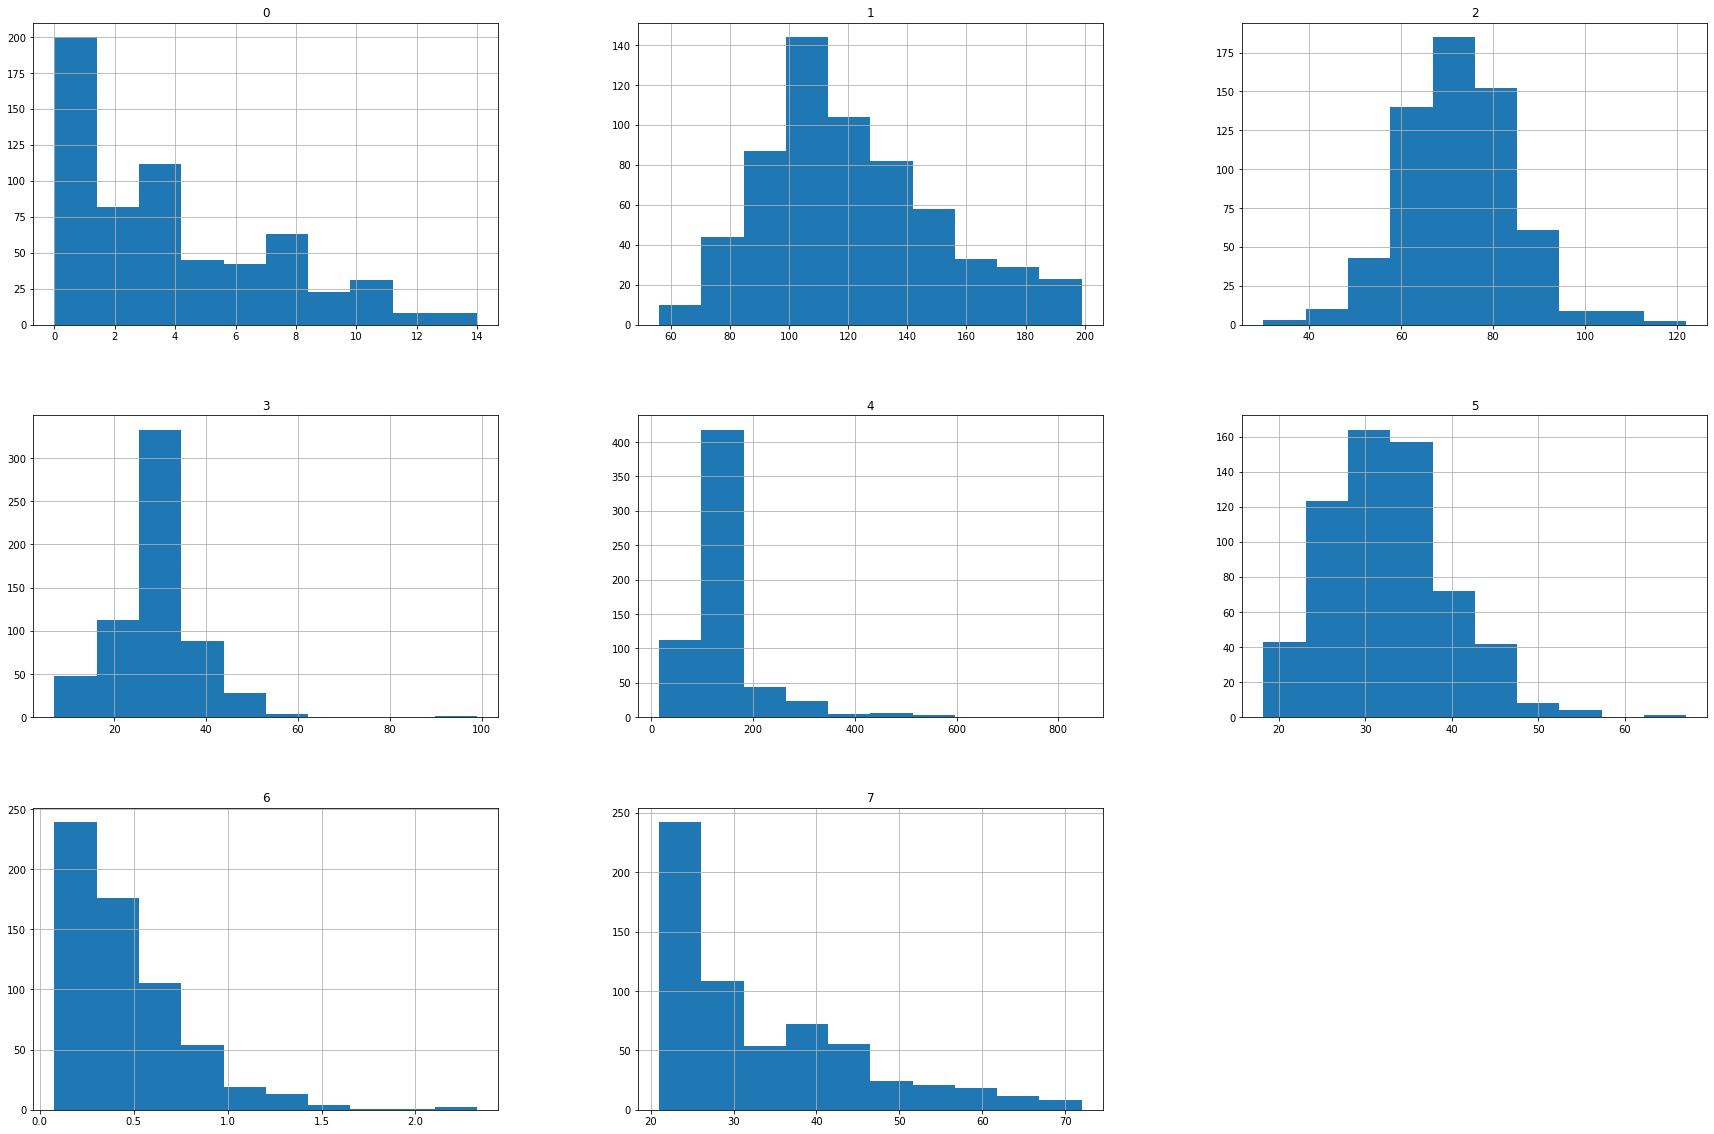

In [6]:
Xtrainpd = pd.DataFrame(Xtrain)
fig, ax = plt.subplots(figsize=(30,20)) 
Xtrainpd.hist(ax = ax)
pass

In [7]:
y.sum()

268.0

In [8]:
y.shape

(768,)

In [9]:
print(ytest.sum())
ytest.shape 


54.0


(154,)

In [10]:
print(ytrain.sum())
ytrain.shape 

214.0


(614,)

Ver a proporção de diabeticos

In [7]:
mean_norm = Xtrain.mean()
std_norm = Xtrain.std()
nstd = 4
Xtrain_norm = (Xtrain - mean_norm)/(nstd*std_norm)
Xtest_norm = (Xtest - mean_norm)/(nstd*std_norm)

In [8]:
feature_vector_length = Xtrain_norm.shape[1]
num_classes = 2
input_shape = (feature_vector_length,)

In [9]:
ytrain2 = to_categorical(ytrain, 2)
ytest2 = to_categorical(ytest, 2)

O Dense do Keras já adiciona o Bias por default.

In [10]:
Nneuronios = list(range(1,25))
# Nneuronios = [20]
listacc = []
for i in Nneuronios:
    model = Sequential()
    model.add(Dense(i, input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(num_classes, activation='softmax'))
    Nepochs = 1000
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.0005, verbose=1, patience=50)
    result = model.fit(Xtrain_norm, ytrain2, epochs=Nepochs, batch_size=50, verbose=1, validation_data=(Xtest_norm,ytest2), callbacks=[es])
    accuracy = model.evaluate(Xtest_norm, ytest2, verbose=1)[1]
    listacc.append(accuracy)

racy: 0.9091
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.8746 - val_loss: 0.2700 - val_accuracy: 0.9221
Epoch 797/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8730 - val_loss: 0.2708 - val_accuracy: 0.9156
Epoch 798/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8730 - val_loss: 0.2737 - val_accuracy: 0.9091
Epoch 799/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8795 - val_loss: 0.2711 - val_accuracy: 0.9091
Epoch 800/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8762 - val_loss: 0.2703 - val_accuracy: 0.9091
Epoch 801/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8713 - val_loss: 0.2746 - val_accuracy: 0.9091
Epoch 802/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.8779 - val_loss: 0.2700 - 

In [11]:
listacc = np.array(listacc)

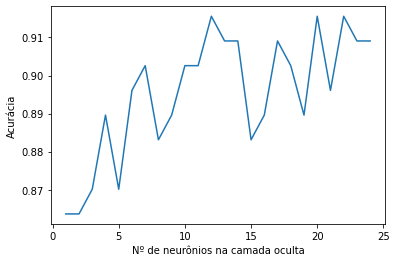

In [12]:
plt.plot(Nneuronios, listacc)
plt.xlabel('Nº de neurônios na camada oculta')
plt.ylabel('Acurácia')
plt.show()

In [13]:
bestneuronios = Nneuronios[listacc.argmax()]

In [14]:
bestneuronios

12

Funcoes de ativacao utilizadas
Funcao de loss
optimizer adam
nepocas 
batchsize

In [15]:
test_results = model.evaluate(Xtest_norm, ytest2, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

5/5 [==============================] - 0s 798us/step - loss: 0.2681 - accuracy: 0.9091
Test results - Loss: 0.2680523991584778 - Accuracy: 0.9090909361839294%


In [17]:
model = Sequential()
model.add(Dense(bestneuronios, input_shape=input_shape))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='softmax'))
Nepochs = 1000
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.0005, verbose=1, patience=50)
result = model.fit(Xtrain_norm, ytrain2, epochs=Nepochs, batch_size=50, verbose=1, validation_data=(Xtest_norm,ytest2), callbacks=[es])
accuracy = model.evaluate(Xtest_norm, ytest2, verbose=1)[1]

racy: 0.8831
Epoch 220/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8518 - val_loss: 0.3639 - val_accuracy: 0.8766
Epoch 221/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8518 - val_loss: 0.3646 - val_accuracy: 0.8831
Epoch 222/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8550 - val_loss: 0.3637 - val_accuracy: 0.8831
Epoch 223/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8502 - val_loss: 0.3636 - val_accuracy: 0.8766
Epoch 224/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8518 - val_loss: 0.3638 - val_accuracy: 0.8831
Epoch 225/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8518 - val_loss: 0.3636 - val_accuracy: 0.8766
Epoch 226/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8502 - val_loss: 0.3637 - 

In [18]:
accuracy

0.8896104097366333

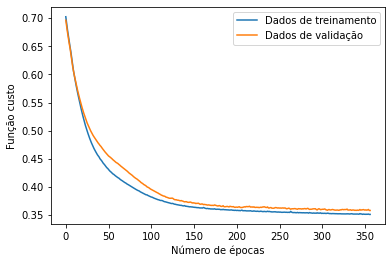

In [19]:
epoch = list(range(1,Nepochs + 1))
plt.plot(result.history['loss'], label='Dados de treinamento')
plt.plot(result.history['val_loss'], label='Dados de validação')
plt.xlabel('Número de épocas')
plt.ylabel('Função custo')
plt.legend(bbox_to_anchor=(1, 1), loc='left')
plt.show()

In [20]:
np.argmax(model.predict(Xtest_norm), axis=-1)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [21]:
Ypred = np.argmax(model.predict(Xtest_norm), axis=-1)
cmatrix = sk.confusion_matrix(ytest,Ypred)
print(cmatrix)

[[92  8]
 [ 9 45]]


Text(0.5, 1.0, 'Matriz de confusão do melhor modelo')

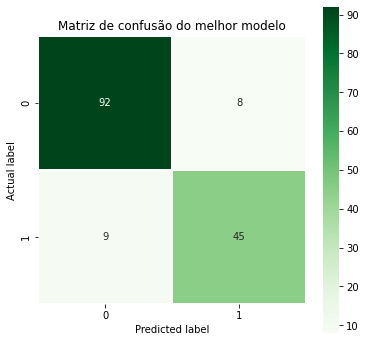

In [23]:
plt.figure(figsize=(6,6))
sns.heatmap(cmatrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Matriz de confusão do melhor modelo'
plt.title(all_sample_title, size = 12)